In [6]:
"""
Tutorial: Understanding MRI vs fMRI Data in Python
Purpose: Download, load, and visualize structural MRI and functional fMRI data
"""

import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn import plotting
import nibabel as nib

print("=" * 60)
print("MRI vs fMRI Tutorial")
print("=" * 60)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/biomedclip/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/biomedclip/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/biomedclip/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/biomedclip/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_in

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [5]:
# 1. Download sample data from one subject
print("\n1. Downloading sample neuroimaging data...")
print("   This may take a moment on first run...")

# Download structural MRI (anatomical T1-weighted image)
print("\n   Downloading structural MRI (T1)...")
anat_data = datasets.fetch_icbm152_2009()
mri_file = anat_data.t1

# Download functional MRI (resting state fMRI)
print("   Downloading functional fMRI (resting state)...")
fmri_data = datasets.fetch_adhd(n_subjects=1)
fmri_file = fmri_data.func[0]

print("\n Data downloaded successfully!")



1. Downloading sample neuroimaging data...
   This may take a moment on first run...



NameError: name 'datasets' is not defined

In [15]:
# 2. Load the data using nibabel
print("\n2. Loading data with nibabel...")

mri_img = nib.load(mri_file)
fmri_img = nib.load(fmri_file)

# Get the actual data arrays
mri_array = mri_img.get_fdata()
fmri_array = fmri_img.get_fdata()

print(f"\n   MRI Data Properties:")
print(f"   - Shape: {mri_array.shape}")
print(f"   - Dimensions: 3D (x, y, z)")
print(f"   - Data type: {mri_array.dtype}")
print(f"   - Voxel size: {mri_img.header.get_zooms()[:3]} mm")

print(f"\n   fMRI Data Properties:")
print(f"   - Shape: {fmri_array.shape}")
print(f"   - Dimensions: 4D (x, y, z, time)")
print(f"   - Number of time points: {fmri_array.shape[3]}")
print(f"   - Data type: {fmri_array.dtype}")
print(f"   - Voxel size: {fmri_img.header.get_zooms()[:3]} mm")
print(f"   - TR (repetition time): {fmri_img.header.get_zooms()[3]} seconds")


# Voxel size explanation:
# - mm = millimeters (1 mm = 0.001 meters = 0.1 cm)
# - Voxel = 3D pixel representing a small cube of brain tissue
# - MRI typically has 1-2mm voxels (HIGH spatial resolution, fine anatomical detail)
# - fMRI typically has 3-4mm voxels (LOWER spatial resolution, but can measure activity over time)
# - A 3mm voxel is 27 times larger in volume than a 1mm voxel (3³ = 27)
# - This is a fundamental tradeoff: fMRI sacrifices spatial detail to gain temporal information

# Why can't fMRI be 1mm like MRI?
# 1. SIGNAL-TO-NOISE RATIO (SNR): The BOLD signal is very weak (~1-5% change). Smaller voxels 
#    capture fewer protons, resulting in too much noise and unreliable measurements.
# 2. TEMPORAL CONSTRAINTS: fMRI needs to scan the whole brain repeatedly (every 1-3 seconds).
#    Smaller voxels require longer scan times, making it impossible to capture brain dynamics.
# 3. PHYSIOLOGICAL LIMITS: The BOLD signal reflects hemodynamic response (blood flow changes),
#    which is inherently blurry and spreads across ~3-5mm due to the vascular system.
# 4. PRACTICAL TRADEOFF: To acquire data fast enough to see brain activity unfold over time,
#    we must use larger voxels. This is the fundamental spatial-temporal resolution tradeoff.

# TR (Repetition Time) explanation:
# - TR = Time between acquiring successive brain volumes (how often we take a "snapshot")
# - Measured in seconds (typical range: 1-3 seconds)
# - If TR = 2 seconds, we capture one complete 3D brain image every 2 seconds
# - This determines our TEMPORAL RESOLUTION - how fast we can detect brain activity changes
# - Example: With TR=2s and 150 timepoints, the total scan duration is 2×150 = 300 seconds (5 minutes)
# - Faster TR (shorter) = better temporal resolution BUT lower SNR and smaller brain coverage
# - Slower TR (longer) = worse temporal resolution BUT better SNR and full brain coverage
# - The BOLD response peaks ~5-6 seconds after neural activity, so TR=2s is often sufficient



2. Loading data with nibabel...

   MRI Data Properties:
   - Shape: (197, 233, 189)
   - Dimensions: 3D (x, y, z)
   - Data type: float64
   - Voxel size: (np.float32(1.0), np.float32(1.0), np.float32(1.0)) mm

   fMRI Data Properties:
   - Shape: (61, 73, 61, 176)
   - Dimensions: 4D (x, y, z, time)
   - Number of time points: 176
   - Data type: float64
   - Voxel size: (np.float32(3.0), np.float32(3.0), np.float32(3.0)) mm
   - TR (repetition time): 2.0 seconds


In [10]:
# 3. Key Differences Explanation
print("\n" + "=" * 60)
print("KEY DIFFERENCES:")
print("=" * 60)
print("""
MRI (Magnetic Resonance Imaging):
- Structural/anatomical image
- 3D volume (single snapshot)
- High spatial resolution
- Shows brain anatomy (gray matter, white matter, CSF)
- Used for: morphometry, segmentation, registration

fMRI (Functional MRI):
- Functional image measuring brain activity
- 4D data (3D volume over time)
- Lower spatial resolution, adds temporal dimension
- Shows BOLD signal (Blood Oxygen Level Dependent)
- Used for: brain activation studies, connectivity analysis
""")



KEY DIFFERENCES:

MRI (Magnetic Resonance Imaging):
- Structural/anatomical image
- 3D volume (single snapshot)
- High spatial resolution
- Shows brain anatomy (gray matter, white matter, CSF)
- Used for: morphometry, segmentation, registration

fMRI (Functional MRI):
- Functional image measuring brain activity
- 4D data (3D volume over time)
- Lower spatial resolution, adds temporal dimension
- Shows BOLD signal (Blood Oxygen Level Dependent)
- Used for: brain activation studies, connectivity analysis




Generating visualizations...
   Creating MRI visualizations...
   Creating fMRI visualizations...
   Saved: mri_vs_fmri_comparison.png


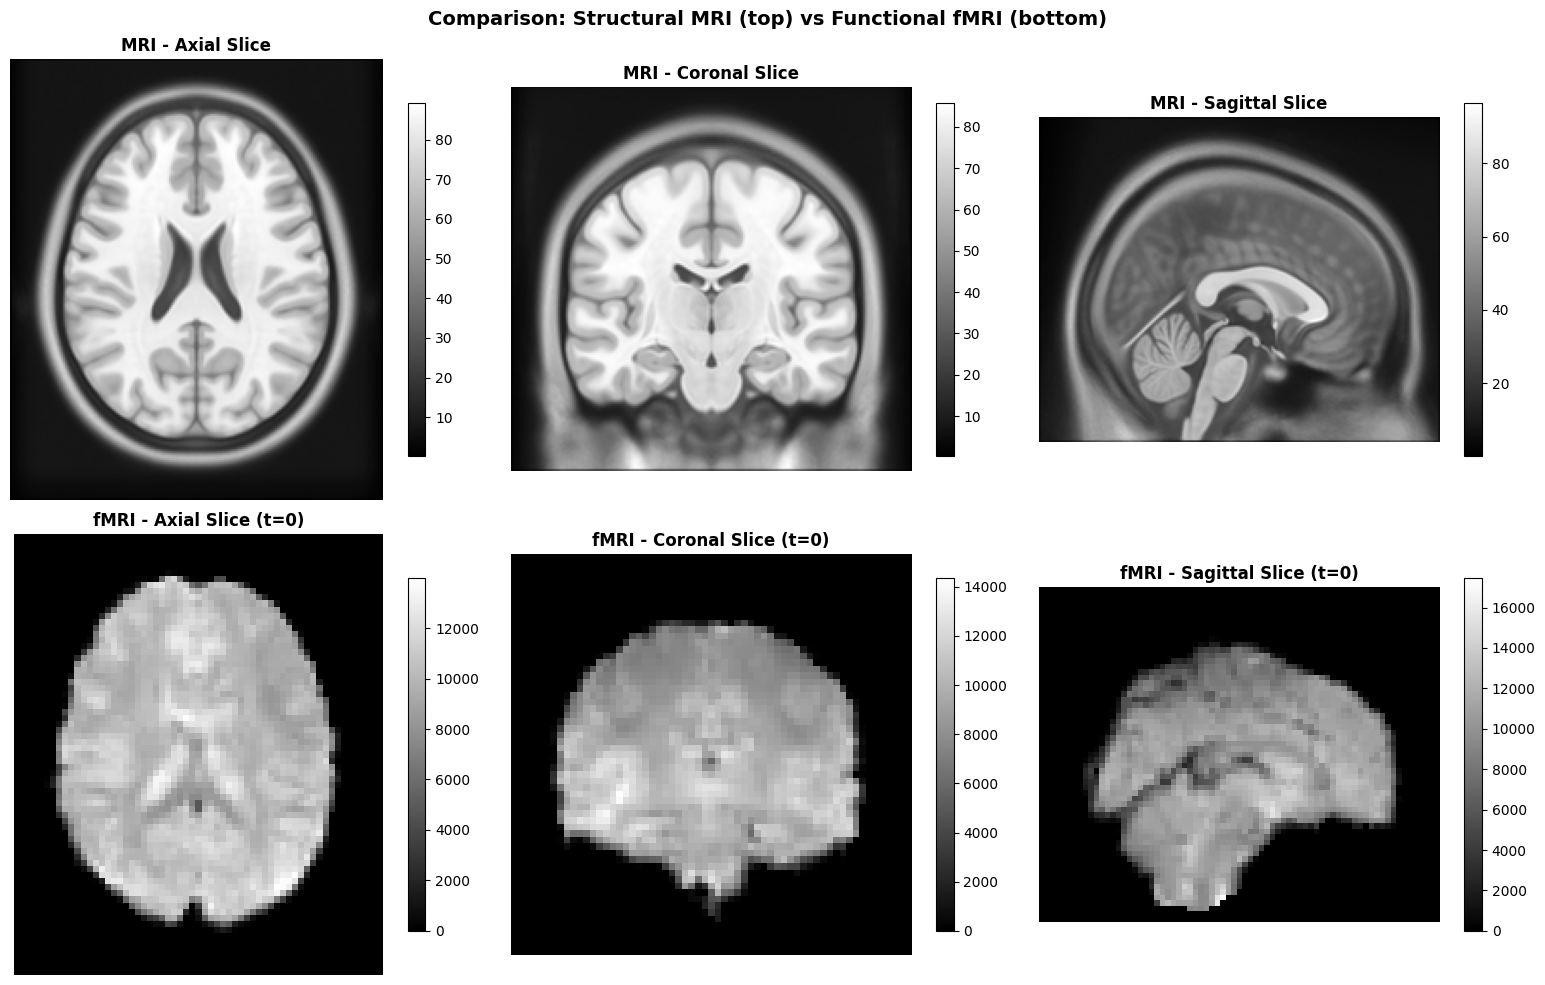

In [16]:
# 4. Visualization
print("\nGenerating visualizations...")

fig = plt.figure(figsize=(16, 10))

# Plot structural MRI
print("   Creating MRI visualizations...")
ax1 = plt.subplot(2, 3, 1)
plt.imshow(mri_array[:, :, mri_array.shape[2]//2].T, cmap='gray', origin='lower')
plt.title('MRI - Axial Slice', fontsize=12, fontweight='bold')
plt.axis('off')
plt.colorbar(shrink=0.8)

ax2 = plt.subplot(2, 3, 2)
plt.imshow(mri_array[:, mri_array.shape[1]//2, :].T, cmap='gray', origin='lower')
plt.title('MRI - Coronal Slice', fontsize=12, fontweight='bold')
plt.axis('off')
plt.colorbar(shrink=0.8)

ax3 = plt.subplot(2, 3, 3)
plt.imshow(mri_array[mri_array.shape[0]//2, :, :].T, cmap='gray', origin='lower')
plt.title('MRI - Sagittal Slice', fontsize=12, fontweight='bold')
plt.axis('off')
plt.colorbar(shrink=0.8)

# Plot functional fMRI (first time point)
print("   Creating fMRI visualizations...")
fmri_first = fmri_array[:, :, :, 0]  # First time point

ax4 = plt.subplot(2, 3, 4)
plt.imshow(fmri_first[:, :, fmri_first.shape[2]//2].T, cmap='gray', origin='lower')
plt.title('fMRI - Axial Slice (t=0)', fontsize=12, fontweight='bold')
plt.axis('off')
plt.colorbar(shrink=0.8)

ax5 = plt.subplot(2, 3, 5)
plt.imshow(fmri_first[:, fmri_first.shape[1]//2, :].T, cmap='gray', origin='lower')
plt.title('fMRI - Coronal Slice (t=0)', fontsize=12, fontweight='bold')
plt.axis('off')
plt.colorbar(shrink=0.8)

ax6 = plt.subplot(2, 3, 6)
plt.imshow(fmri_first[fmri_first.shape[0]//2, :, :].T, cmap='gray', origin='lower')
plt.title('fMRI - Sagittal Slice (t=0)', fontsize=12, fontweight='bold')
plt.axis('off')
plt.colorbar(shrink=0.8)

plt.suptitle('Comparison: Structural MRI (top) vs Functional fMRI (bottom)', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('mri_vs_fmri_comparison.png', dpi=150, bbox_inches='tight')
print("   Saved: mri_vs_fmri_comparison.png")


# Array indexing explanation:
# - mri_array has shape (x, y, z) - three dimensions
# - mri_array.shape[0] = total number of positions in x direction (e.g., 176)
# - mri_array.shape[1] = total number of positions in y direction (e.g., 208)
# - mri_array.shape[2] = total number of positions in z direction (e.g., 176)
#
# Slicing to extract 2D planes from 3D volume:
# - mri_array[:, :, slice_z] = AXIAL slice (horizontal, like looking down at the brain)
#   Takes ALL x, ALL y, but only one specific z → extracts a 2D plane
# - mri_array[:, slice_y, :] = CORONAL slice (vertical, like looking at face)
#   Takes ALL x, one specific y, ALL z → extracts a 2D plane
# - mri_array[slice_x, :, :] = SAGITTAL slice (vertical, like looking from the side)
#   Takes one specific x, ALL y, ALL z → extracts a 2D plane
#
# - // is integer division (e.g., 100//2 = 50, ignoring decimals)
# - mri_array.shape[2]//2 gives the MIDDLE slice index in z direction
# - .T means TRANSPOSE - flips the array so it displays correctly (swaps rows and columns)
# 
# Example: if mri_array.shape = (176, 208, 176)
# - mri_array[:, :, 88] extracts axial slice at z=88 (middle), resulting in shape (176, 208)
# - .T transposes it to shape (208, 176) for proper anatomical orientation



   Creating fMRI time series visualization...
   Saved: fmri_timeseries.png


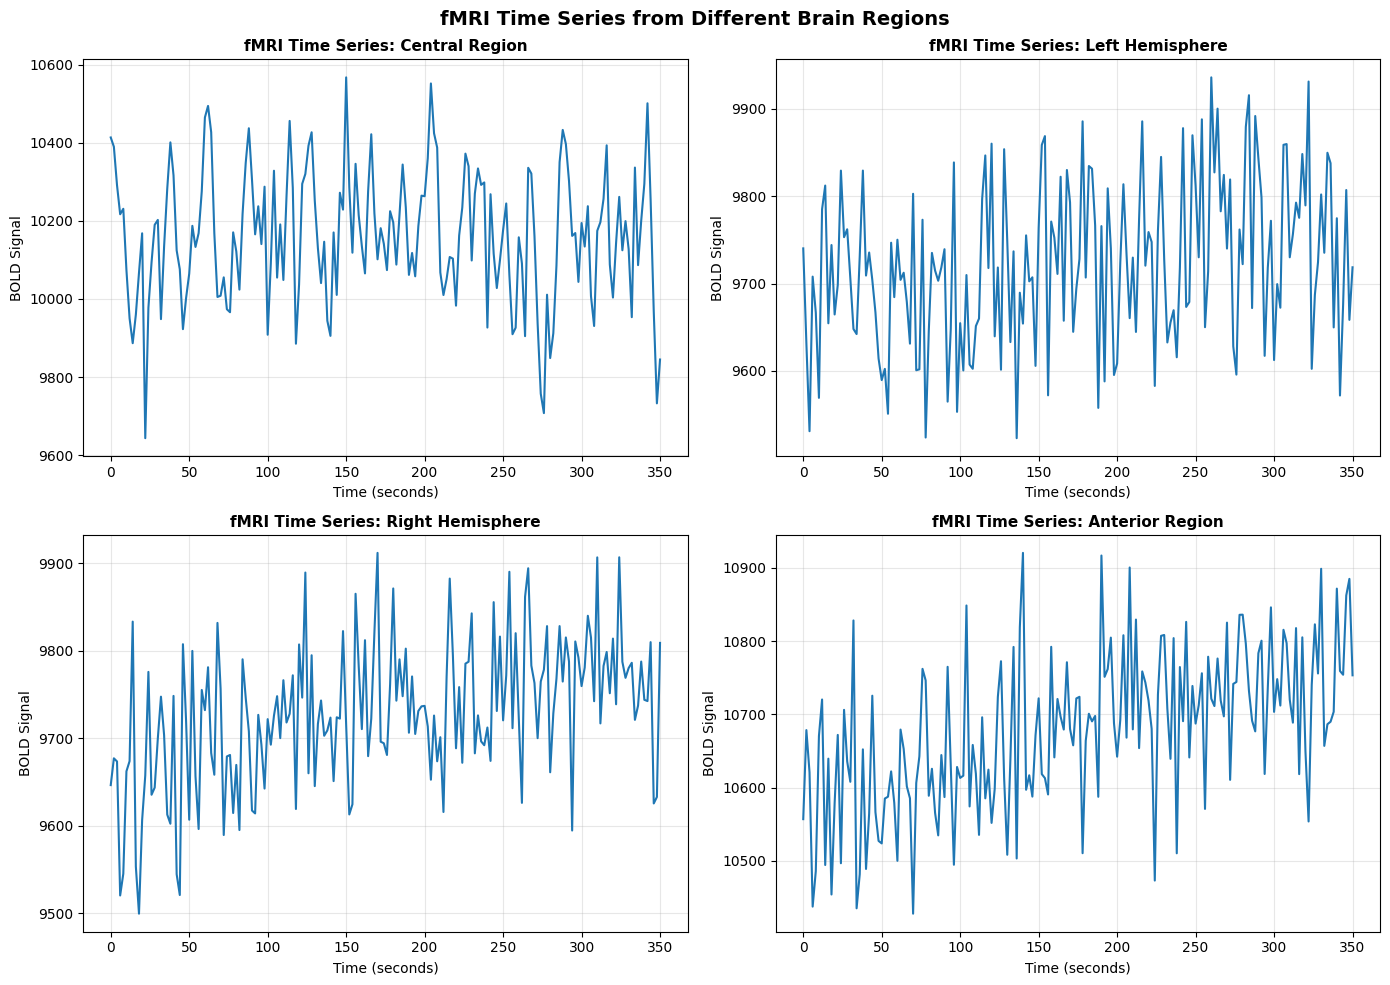

In [13]:
# 5. Time series visualization for fMRI
print("\n   Creating fMRI time series visualization...")
fig2, axes = plt.subplots(2, 2, figsize=(14, 10))

# Extract a voxel time series from different brain regions
mid_x, mid_y, mid_z = fmri_array.shape[0]//2, fmri_array.shape[1]//2, fmri_array.shape[2]//2

positions = [
    (mid_x, mid_y, mid_z + 5, "Central Region"),
    (mid_x - 10, mid_y, mid_z, "Left Hemisphere"),
    (mid_x + 10, mid_y, mid_z, "Right Hemisphere"),
    (mid_x, mid_y + 10, mid_z, "Anterior Region")
]

for idx, (x, y, z, label) in enumerate(positions):
    ax = axes[idx // 2, idx % 2]
    time_series = fmri_array[x, y, z, :]
    time_points = np.arange(len(time_series)) * fmri_img.header.get_zooms()[3]
    
    ax.plot(time_points, time_series, linewidth=1.5)
    ax.set_xlabel('Time (seconds)', fontsize=10)
    ax.set_ylabel('BOLD Signal', fontsize=10)
    ax.set_title(f'fMRI Time Series: {label}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('fMRI Time Series from Different Brain Regions', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('fmri_timeseries.png', dpi=150, bbox_inches='tight')
print("   Saved: fmri_timeseries.png")


In [12]:
# 6. Summary statistics
print("\n" + "=" * 60)
print("SUMMARY STATISTICS:")
print("=" * 60)
print(f"\nMRI Statistics:")
print(f"  Mean intensity: {np.mean(mri_array):.2f}")
print(f"  Std intensity: {np.std(mri_array):.2f}")
print(f"  Min/Max: {np.min(mri_array):.2f} / {np.max(mri_array):.2f}")

print(f"\nfMRI Statistics (across all timepoints):")
print(f"  Mean intensity: {np.mean(fmri_array):.2f}")
print(f"  Std intensity: {np.std(fmri_array):.2f}")
print(f"  Min/Max: {np.min(fmri_array):.2f} / {np.max(fmri_array):.2f}")
print(f"  Temporal mean std: {np.mean(np.std(fmri_array, axis=3)):.2f}")

print("\n" + "=" * 60)
print("Tutorial Complete!")
print("=" * 60)
print("\nGenerated files:")
print("  - mri_vs_fmri_comparison.png")
print("  - fmri_timeseries.png")
print("\nNext steps:")
print("  1. Explore preprocessing (motion correction, spatial smoothing)")
print("  2. Learn statistical analysis (GLM for task fMRI)")
print("  3. Study connectivity analysis (seed-based, ICA)")
print("  4. Practice registration and normalization")

plt.show()


SUMMARY STATISTICS:

MRI Statistics:
  Mean intensity: 28.32
  Std intensity: 26.67
  Min/Max: 0.07 / 97.33

fMRI Statistics (across all timepoints):
  Mean intensity: 2308.08
  Std intensity: 4230.48
  Min/Max: 0.00 / 24359.93
  Temporal mean std: 31.75

Tutorial Complete!

Generated files:
  - mri_vs_fmri_comparison.png
  - fmri_timeseries.png

Next steps:
  1. Explore preprocessing (motion correction, spatial smoothing)
  2. Learn statistical analysis (GLM for task fMRI)
  3. Study connectivity analysis (seed-based, ICA)
  4. Practice registration and normalization
